In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train['Cabin'].isnull().sum()

687

In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_train['Survived'].unique()

array([0, 1])

In [8]:
df_train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [9]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())

In [10]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].median)

In [12]:
#df_train['Cabin'] = df_train['Cabin'].fillna(df_train['Cabin'].median)

In [13]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df_train=df_train.drop(labels='Cabin',axis=1)

In [15]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [16]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
df_test = df_test.drop(labels='Cabin',axis=1)

In [18]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())

In [19]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [22]:
df_train['Name'] = label.fit_transform(df_train['Name'])

In [23]:
df_train['Name']

0      108
1      190
2      353
3      272
4       15
      ... 
886    548
887    303
888    413
889     81
890    220
Name: Name, Length: 891, dtype: int64

In [24]:
df_train['Age'] = label.fit_transform(df_train['Age'])

In [25]:
df_train['Sex'] = label.fit_transform(df_train['Sex'])
df_train['SibSp'] = label.fit_transform(df_train['SibSp'])
df_train['Parch'] = label.fit_transform(df_train['Parch'])
df_train['Ticket'] = label.fit_transform(df_train['Ticket'])
df_train['Fare'] = label.fit_transform(df_train['Fare'])
#df_train['Cabin'] = label.fit_transform(df_train['Cabin'])

In [26]:
df_train['Embarked'] = label.fit_transform(df_train['Embarked'].astype(str))

In [27]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,28,1,0,523,18,3
1,2,1,1,190,0,52,1,0,596,207,1
2,3,1,3,353,0,34,0,0,669,41,3
3,4,1,1,272,0,48,1,0,49,189,3
4,5,0,3,15,1,48,0,0,472,43,3


In [28]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [29]:
df_test['Name'] = label.fit_transform(df_test['Name'])
df_test['Age'] = label.fit_transform(df_test['Age'])
df_test['Sex'] = label.fit_transform(df_test['Sex'])
df_test['SibSp'] = label.fit_transform(df_test['SibSp'])
df_test['Parch'] = label.fit_transform(df_test['Parch'])
df_test['Ticket'] = label.fit_transform(df_test['Ticket'])
df_test['Fare'] = label.fit_transform(df_test['Fare'])
df_test['Embarked'] = label.fit_transform(df_test['Embarked'].astype(str))


In [30]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,206,1,45,0,0,152,24,1
1,893,3,403,0,61,1,0,221,5,2
2,894,2,269,1,75,0,0,73,41,1
3,895,3,408,1,34,0,0,147,34,2
4,896,3,178,0,27,1,1,138,46,2


In [31]:
x = df_train
target= df_test

In [32]:
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,28,1,0,523,18,3
1,2,1,1,190,0,52,1,0,596,207,1
2,3,1,3,353,0,34,0,0,669,41,3
3,4,1,1,272,0,48,1,0,49,189,3
4,5,0,3,15,1,48,0,0,472,43,3


In [33]:
target.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,206,1,45,0,0,152,24,1
1,893,3,403,0,61,1,0,221,5,2
2,894,2,269,1,75,0,0,73,41,1
3,895,3,408,1,34,0,0,147,34,2
4,896,3,178,0,27,1,1,138,46,2


In [34]:
X = x.drop(labels=["PassengerId",'Survived'],axis=1)
y = x['Survived']

In [35]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.82737724, -1.31021659,  0.73769513, ...,  0.91896631,
        -1.24717035,  0.58796609],
       [-1.56610693, -0.99141018, -1.35557354, ...,  1.28262456,
         1.45116508, -1.91264387],
       [ 0.82737724, -0.35768524, -1.35557354, ...,  1.64628282,
        -0.91880149,  0.58796609],
       ...,
       [ 0.82737724, -0.12441226, -1.35557354, ...,  1.67617254,
         0.36612014,  0.58796609],
       [-1.56610693, -1.41518943,  0.73769513, ..., -1.64656796,
         0.6802121 , -1.91264387],
       [ 0.82737724, -0.87477369,  0.73769513, ...,  0.63501397,
        -1.07584746, -0.66233889]])

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.7,random_state=120)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_pred,y_test)

0.7996794871794872

array([[341,  43],
       [ 82, 158]])

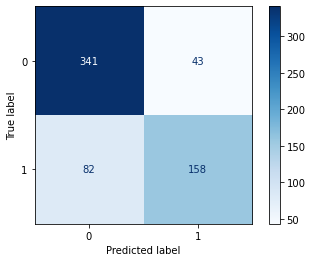

In [37]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(rf,X_test,y_test,cmap=plt.cm.Blues,normalize=None)
#disp = plot_confusion_matrix(lg,X_test,y_test,cmap='viridis',normalize=None)
disp.confusion_matrix


In [38]:
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,28,1,0,523,18,3
1,2,1,1,190,0,52,1,0,596,207,1
2,3,1,3,353,0,34,0,0,669,41,3
3,4,1,1,272,0,48,1,0,49,189,3
4,5,0,3,15,1,48,0,0,472,43,3


In [39]:
k = rf.fit(X, y)
k

RandomForestClassifier()

In [40]:
random_grid = {'n_estimators': [1,2,3,4,5,6,7,15,20,25,260,600,900],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [10, 20, 30, 40, 50, 60],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] C=0.1, degree=1, gamma=1 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: Invalid parameter C for estimator RandomForestClassifier(). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
randomcv= RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
randomcv.fit(X,y)

In [ ]:
model = RandomForestClassifier(n_estimators=260,min_samples_split=10,min_samples_leaf=4,max_features='auto',max_depth=40,bootstrap=True)

In [ ]:
model.fit(X,y)

In [ ]:
test_data = df_test.drop("PassengerId", axis=1).copy()
#prediction = rf.predict(test_data)
test_data

In [ ]:
prediction = model.predict(test_data)

In [ ]:
df_test['PassengerId']

In [ ]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": prediction
    })


In [ ]:
submission

In [ ]:
submission.to_csv('gender_submission.csv')